In [1]:
import os
import MDAnalysis as md
import MDAnalysis.analysis.rms
import h5py
import numpy as np
import scipy
import matplotlib.pyplot as plt
from MDAnalysis.analysis.base import (AnalysisBase, AnalysisFromFunction, analysis_class)
import matplotlib.pyplot as plt
import math
from scipy.stats import norm

In [2]:
# Pulse parameters
pulse_peak = 30
pulse_width = 30 / (2 * math.sqrt(2 * math.log(2)))

In [3]:
# Since we want the values on the x-axis to be in terms of standard deviation, we define the ticks here
x = np.linspace(-3 * pulse_width + pulse_peak, 3 * pulse_width + pulse_peak, 100)
pulse_value = norm.pdf(x, pulse_peak, pulse_width)
x_ticks = np.arange(-3 * pulse_width + pulse_peak, 4 * pulse_width+ pulse_peak, pulse_width)

In [4]:
# This is for calculating the Full Width at Half Maximum (FWHM)
half_max_index = int(len(pulse_value) / 2 - 1)
half_max = pulse_value[half_max_index] / 2
fwhm = 2 * np.sqrt(2 * np.log(2)) * pulse_width
y_fwhm = norm.pdf(pulse_peak, pulse_peak, pulse_width) / 2
x_fwhm = [pulse_peak - fwhm / 2, pulse_peak + fwhm / 2]

Text(17.5, 0.015650100790949358, '')

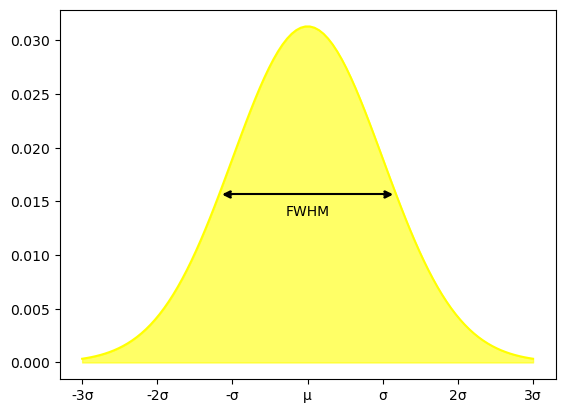

In [5]:
# Here we plot the pulse as a Gaussian distribution
fig, ax = plt.subplots()
ax.plot(x, pulse_value, color='yellow')
ax.fill_between(x, pulse_value, color='yellow', alpha = 0.6)
ax.set_xticks(x_ticks)
ax.set_xticklabels(['-3σ', '-2σ', '-σ', 'μ', 'σ', '2σ', '3σ'])
ax.plot([x_fwhm[0]+1, x_fwhm[1]-1], [half_max, half_max], color='black')
ax.annotate(f"FWHM", xy=(pulse_peak, half_max - 0.002), ha='center')

# Here we make two arrows to indicate the FWHM
ax.annotate('', xy=(x_fwhm[1], half_max), xytext=(x_fwhm[1]-2.5, half_max),textcoords='data', arrowprops = dict(arrowstyle='->', color='black', linewidth=2))
ax.annotate('', xy=(x_fwhm[0], half_max), xytext=(x_fwhm[0]+2.5, half_max), textcoords='data', arrowprops = dict(arrowstyle='->', color='black', linewidth=2))


Text(5.8, 1.5, 'D')

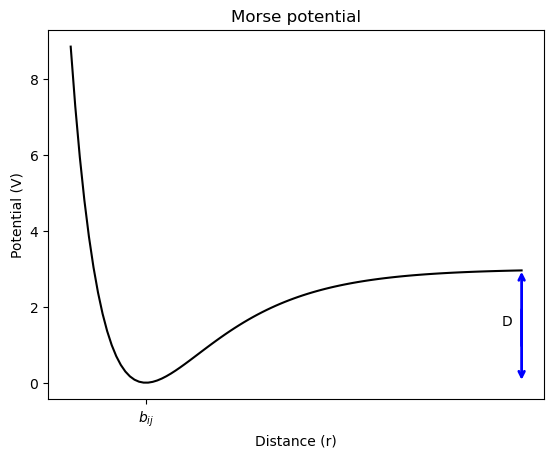

In [ ]:
# Now we make the plot for the Morse potential
fig, ax = plt.subplots()

# These are the x-values that will be plotted ...
values = np.linspace(0, 6.0, 100)

# and these are the parameters for the function (these are only chosen as a good visual example)
D = 3
a = 1
re = 1

# Here we calculate all the values using the Morse potential function
function = [D * (1 - math.exp(-a * (r - re))) ** 2.0 for r in values]

# And now we plot
ax.plot(values, function, color='black')
x_ticks = [1]
ax.set_xticks(x_ticks)
ax.set_xticklabels([r'$b_{ij}$'])
plt.xlabel('Distance (r)')
plt.ylabel('Potential (V)')
plt.title('Morse potential')

# And lastly we plot and annotate the arrow indicating D
ax.annotate('', xy=(6, 3), xytext=(6, 2.9-2),textcoords='data', arrowprops = dict(arrowstyle='->', color='blue', linewidth=2))
ax.annotate('', xy=(6, 0), xytext=(6, 0+2),textcoords='data', arrowprops = dict(arrowstyle='->', color='blue', linewidth=2))
ax.annotate(f"D", xy=(5.8, 1.5), ha='center')